Importations

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as stats
import math


Cleaning Data 

In [9]:

data_path = Path('../data')
csv_files = sorted(data_path.glob('season-*.csv'))

# Loading data 
dfs_raw = []
for file in csv_files:
    df= pd.read_csv(file)
    dfs_raw.append(df)

df = pd.concat(dfs_raw) #in case of problem we have to use ignore_index=True

# Not necesary 
df.drop(columns=['HTHG', 'HTAG', 'HTR'], inplace=True)

# Converting into appropriate data types
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['FTHG'] = df['FTHG'].astype(int)
df['FTAG'] = df['FTAG'].astype(int)
df['FTR'] = df['FTR'].astype('category')
df['Season'] = df['Season'].astype('category')

# Extracting date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0 = Lunes
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Creating new variables further analysis 
df['TotalGoals'] = df['FTHG'] + df['FTAG']
df['GoalDifference'] = df['FTHG'] - df['FTAG']
df['IsHomeWin'] = (df['FTR'] == 'H').astype(int)
df['IsDraw'] = (df['FTR'] == 'D').astype(int)
df['IsAwayWin'] = (df['FTR'] == 'A').astype(int)

#  Coding teams as categorical variables
df['HomeTeam'] = df['HomeTeam'].astype('category')
df['AwayTeam'] = df['AwayTeam'].astype('category')

# Verifing duplicates 
duplicates = df.duplicated(subset=['Date', 'HomeTeam', 'AwayTeam']).sum()
print(f"Duplicados encontrados: {duplicates}")

df.sort_values('Date', inplace=True)

# Necesary afther sorting 
df.reset_index(drop=True, inplace=True)

# 10. Ver resumen
print(df.info())
print(df.head())

# 11. Guardar (opcional)
df.to_csv('cleaned_football_data.csv', index=False)

Duplicados encontrados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12324 entries, 0 to 12323
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            12324 non-null  datetime64[ns]
 1   HomeTeam        12324 non-null  category      
 2   AwayTeam        12324 non-null  category      
 3   FTHG            12324 non-null  int64         
 4   FTAG            12324 non-null  int64         
 5   FTR             12324 non-null  category      
 6   Season          12322 non-null  category      
 7   Year            12324 non-null  int32         
 8   Month           12324 non-null  int32         
 9   Day             12324 non-null  int32         
 10  DayOfWeek       12324 non-null  int32         
 11  IsWeekend       12324 non-null  int64         
 12  TotalGoals      12324 non-null  int64         
 13  GoalDifference  12324 non-null  int64         
 14  IsHomeWin       12324 non-nu

/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/2506797080.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


Measures of central tendency 


1. GOLES COMO LOCAL (GENERAL)
  Media:        1.55 goles
  Mediana:      1.00 goles
  Moda:         1 goles
  Desv. Estándar: 1.31
  Mínimo:       0 goles
  Máximo:       10 goles


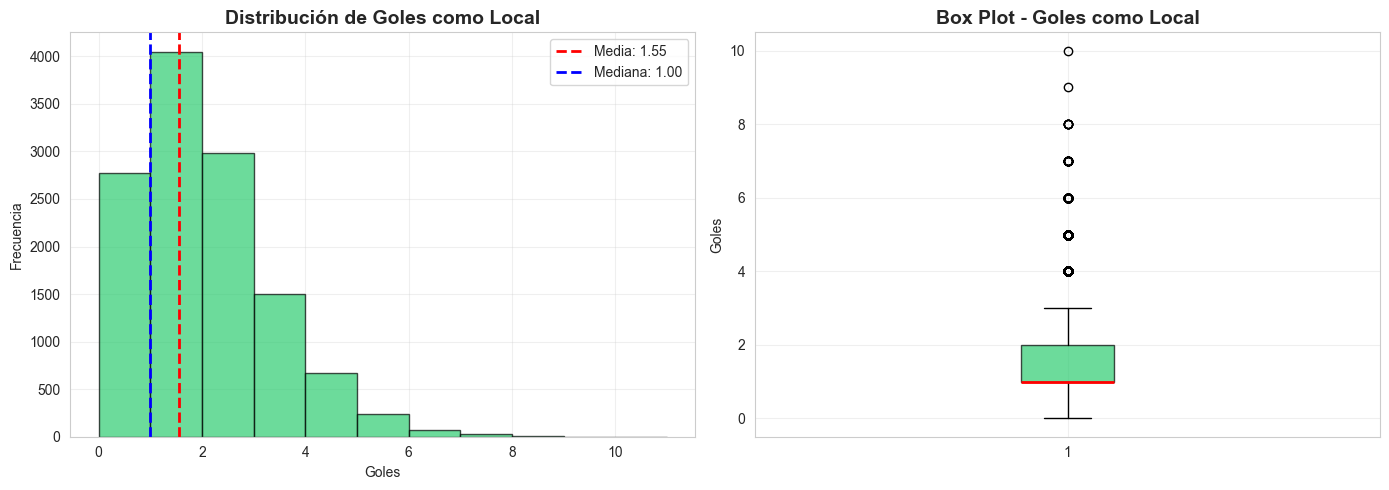


2. GOLES COMO VISITANTE (GENERAL)
  Media:        1.11 goles
  Mediana:      1.00 goles
  Moda:         1 goles
  Desv. Estándar: 1.11
  Mínimo:       0 goles
  Máximo:       8 goles


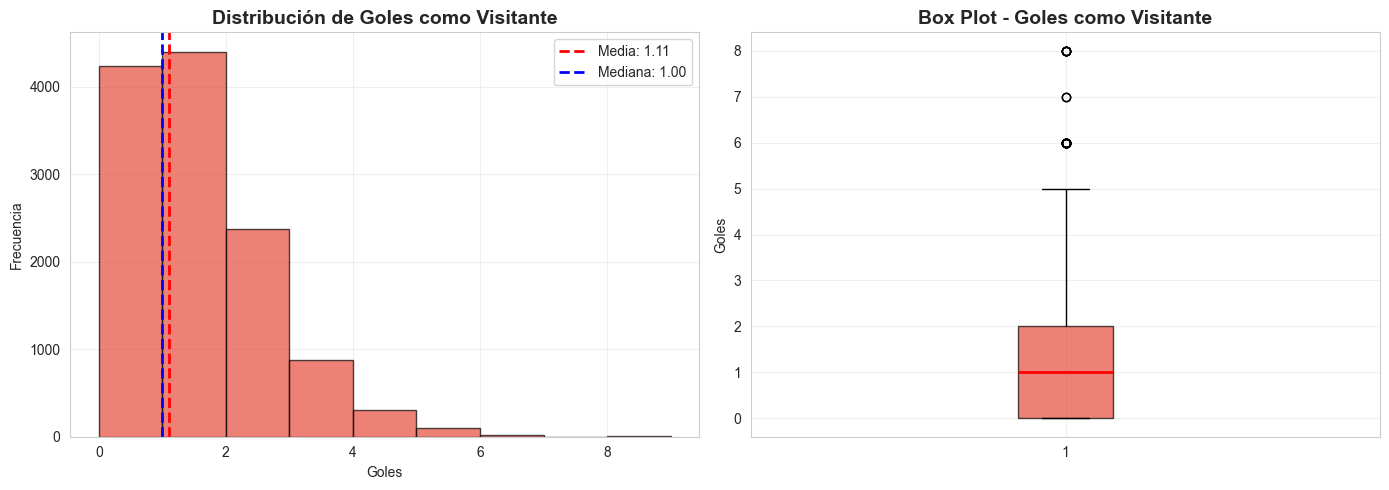

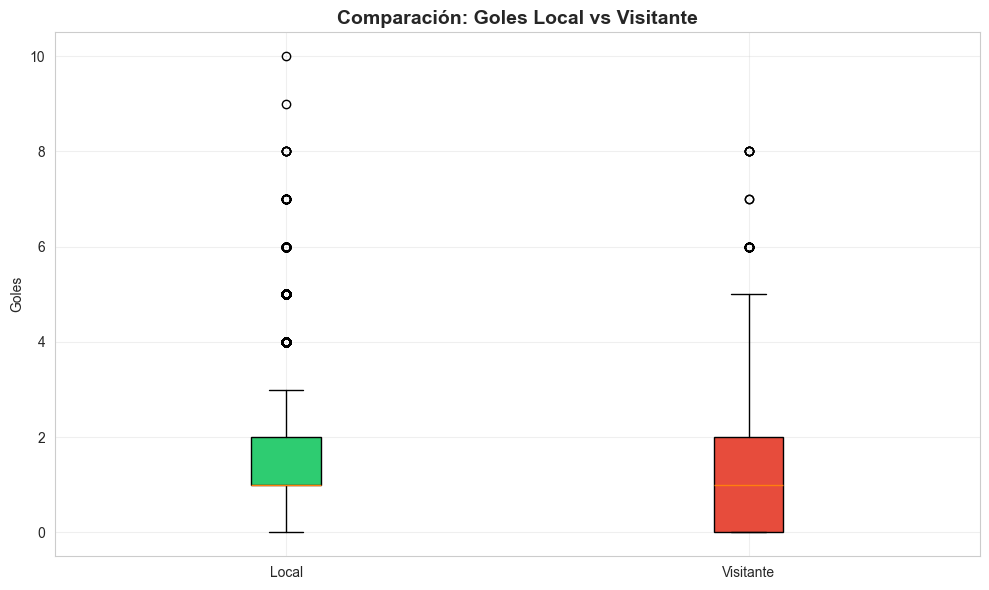


5. GOLES TOTALES POR TEMPORADA
           Media_Total  Mediana_Total  Total_Goles  Partidos  Media_Local  \
Season                                                                      
1993-1994         2.60            2.0          988       380         1.59   
1994-1995         2.54            2.0          966       380         1.54   
1995-1996         2.70            2.0         1245       461         1.56   
1996-1997         2.75            3.0         1271       462         1.65   
1997-1998         2.66            3.0         1009       380         1.58   
1998-1999         2.64            2.0         1000       379         1.61   
1999-2000         2.63            3.0          999       380         1.57   
2000-2001         2.88            3.0         1095       380         1.77   
2001-2002         2.53            2.0          961       380         1.50   
2002-2003         2.67            2.0         1016       380         1.55   
2003-2004         2.67            2.0       

/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_goals = df.groupby('Season').agg({


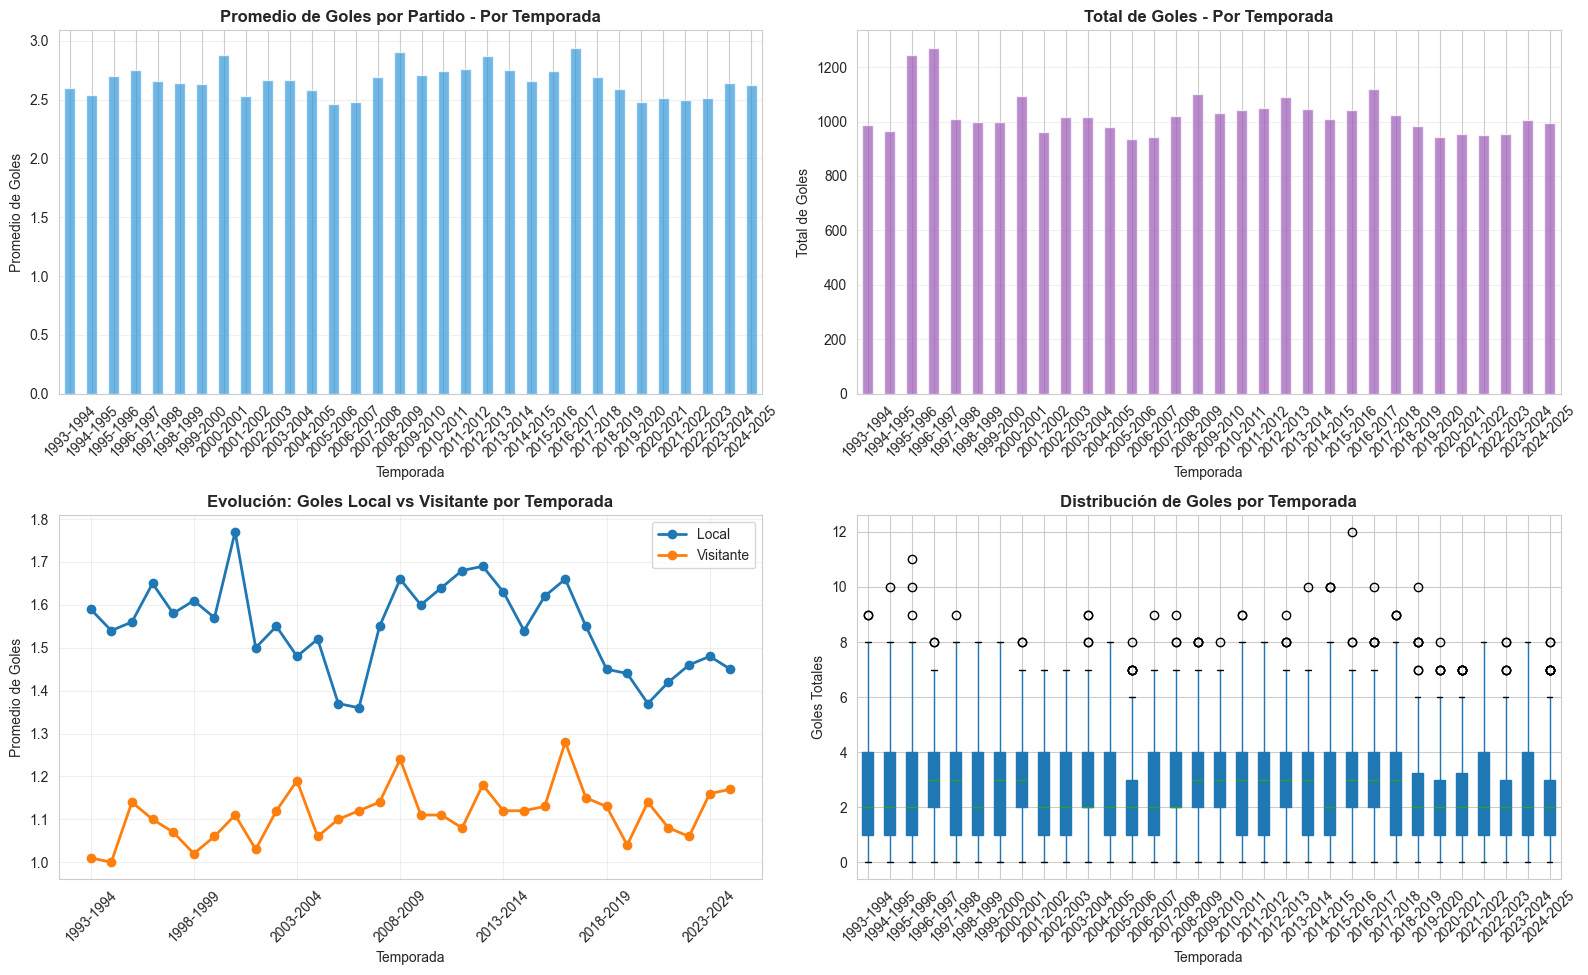

        Season      Equipo  Victorias_Local  Empates_Local  Derrotas_Local  \
0    1993-1994    Albacete                8              8               3   
19   1993-1994    Zaragoza               14              3               2   
18   1993-1994   Vallecano                7              6               6   
17   1993-1994  Valladolid                4             10               5   
16   1993-1994    Valencia               10              6               3   
..         ...         ...              ...            ...             ...   
625  2024-2025  Ath Bilbao               11              6               2   
624  2024-2025      Alaves                6              6               7   
642  2024-2025   Vallecano                6              8               5   
632  2024-2025      Girona                7              3               9   
643  2024-2025  Villarreal                9              7               3   

     Victorias_Visitante  Empates_Visitante  Derrotas_Visitante

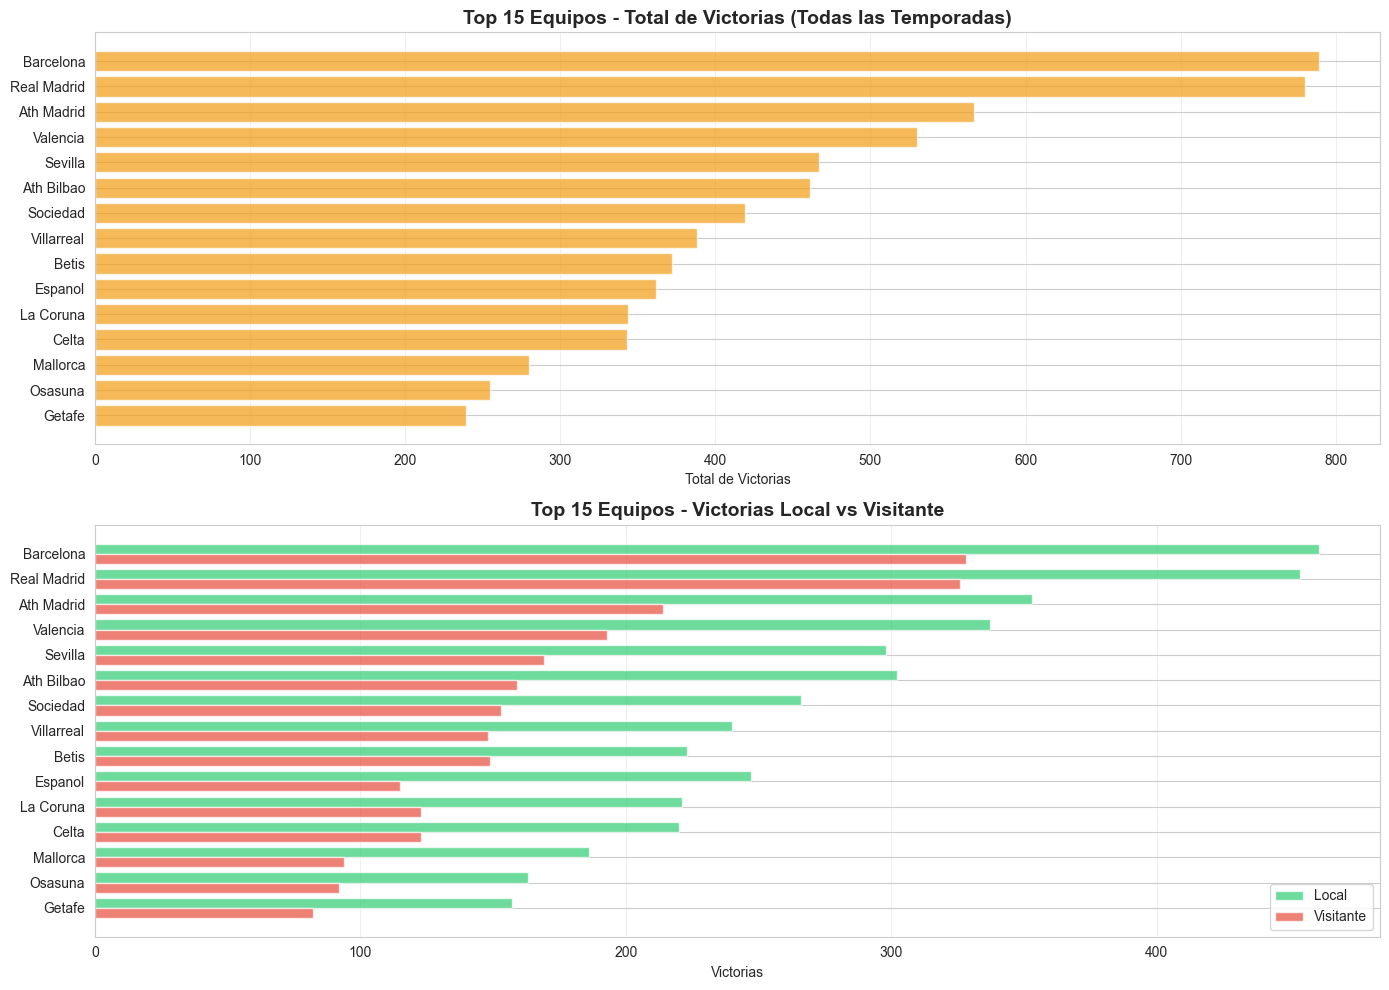

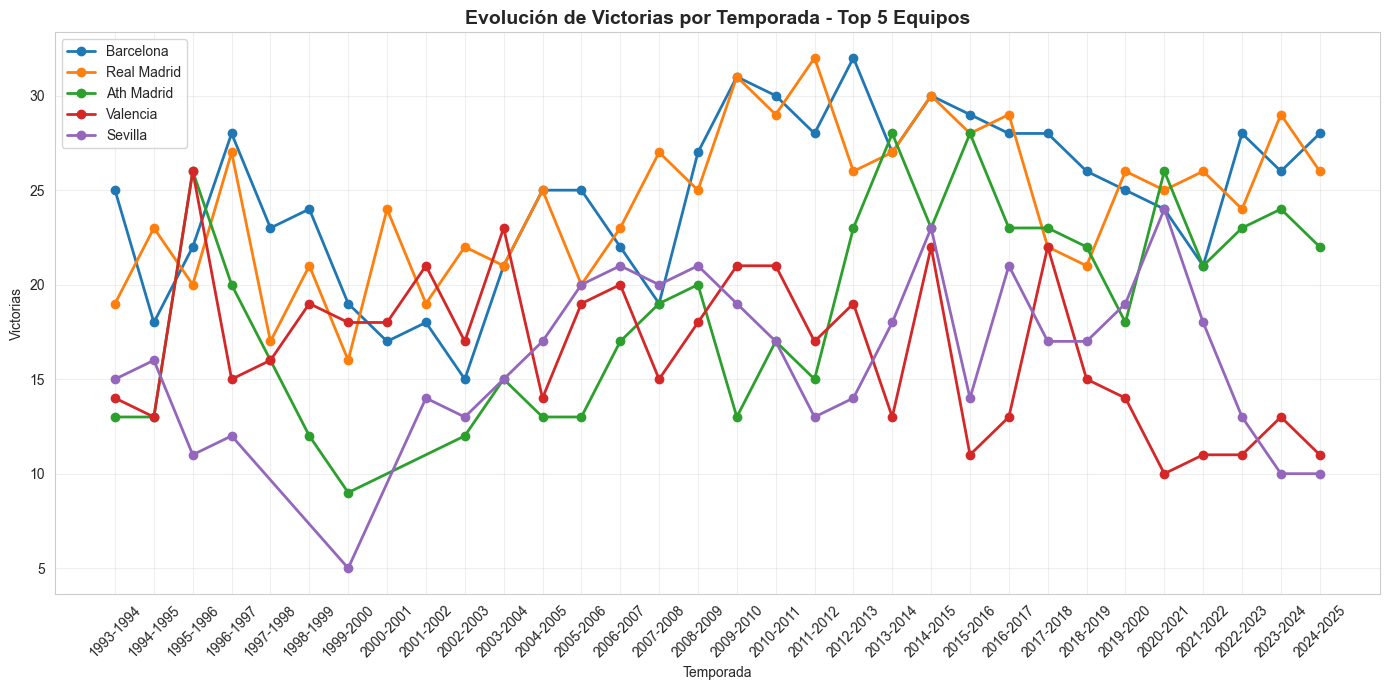

MEJORES EQUIPOS POR DÉCADAS (basado en campeonatos ganados)

Década 1990s:
Barcelona: 3 campeonatos

Década 2000s:
Barcelona: 5 campeonatos

Década 2010s:
Barcelona: 6 campeonatos

Década 2020s:
Barcelona: 2 campeonatos

Década 2020s:
Real Madrid: 2 campeonatos


/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:388: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:388: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:388: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:388: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:389: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.savefig('top3_equipos_por_decada_barras.png', dpi=300, bbox_inches='tight')
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/i

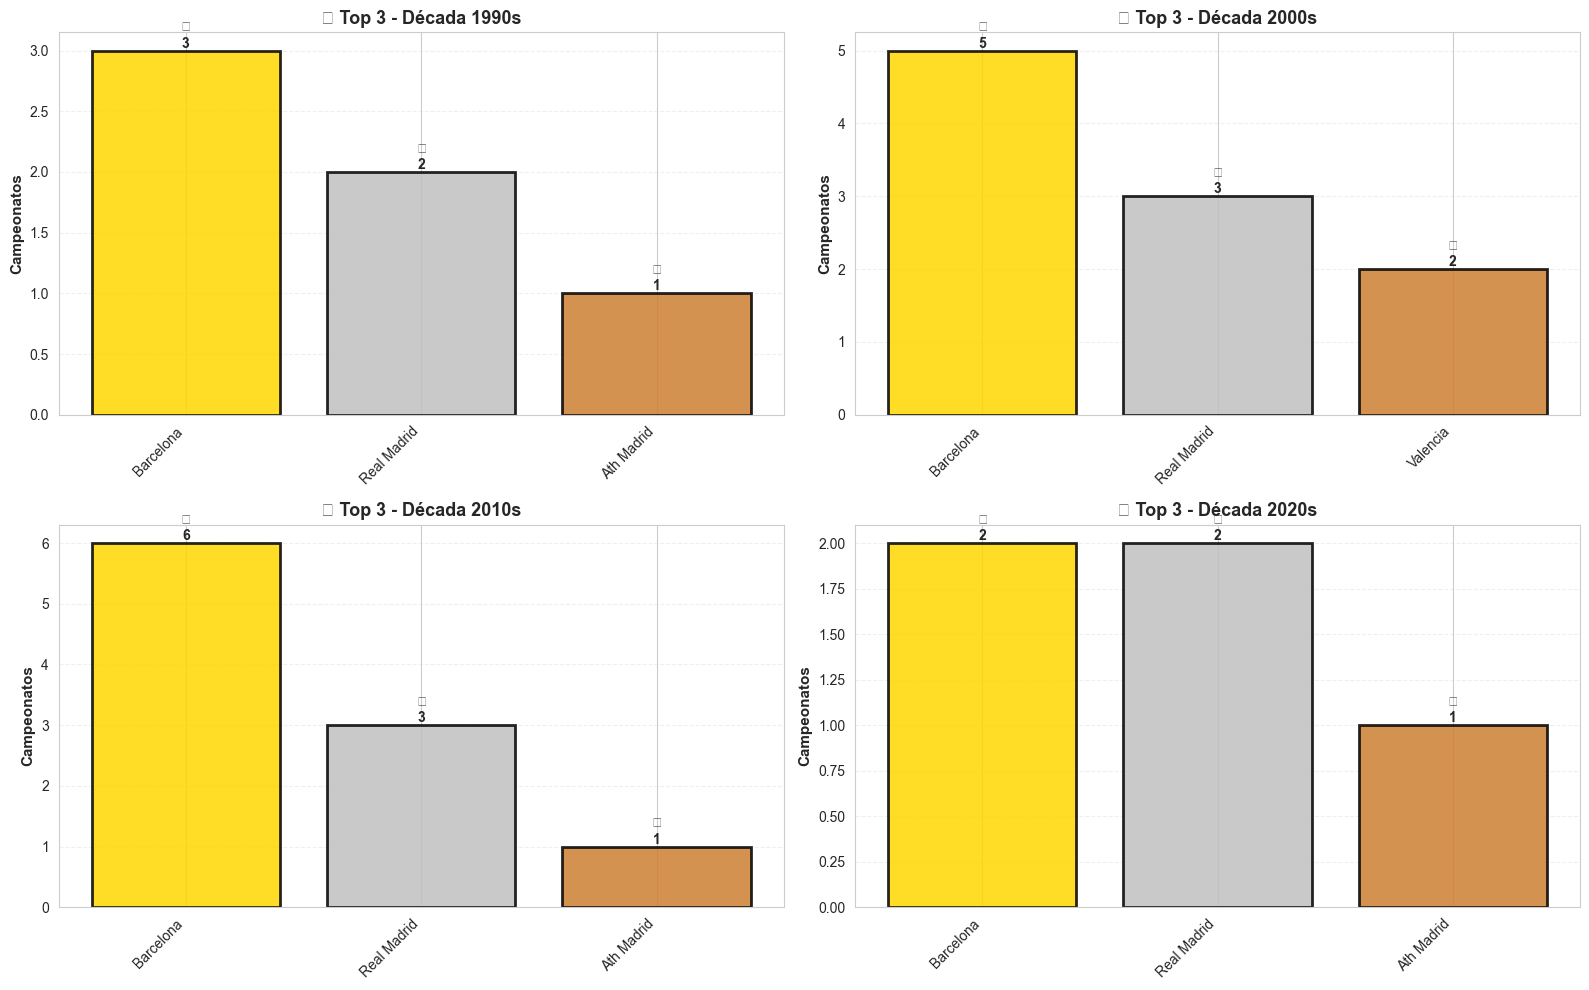

/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:420: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:421: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.savefig('heatmap_campeonatos_decadas.png', dpi=300, bbox_inches='tight')
/Users/juanmy_bg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


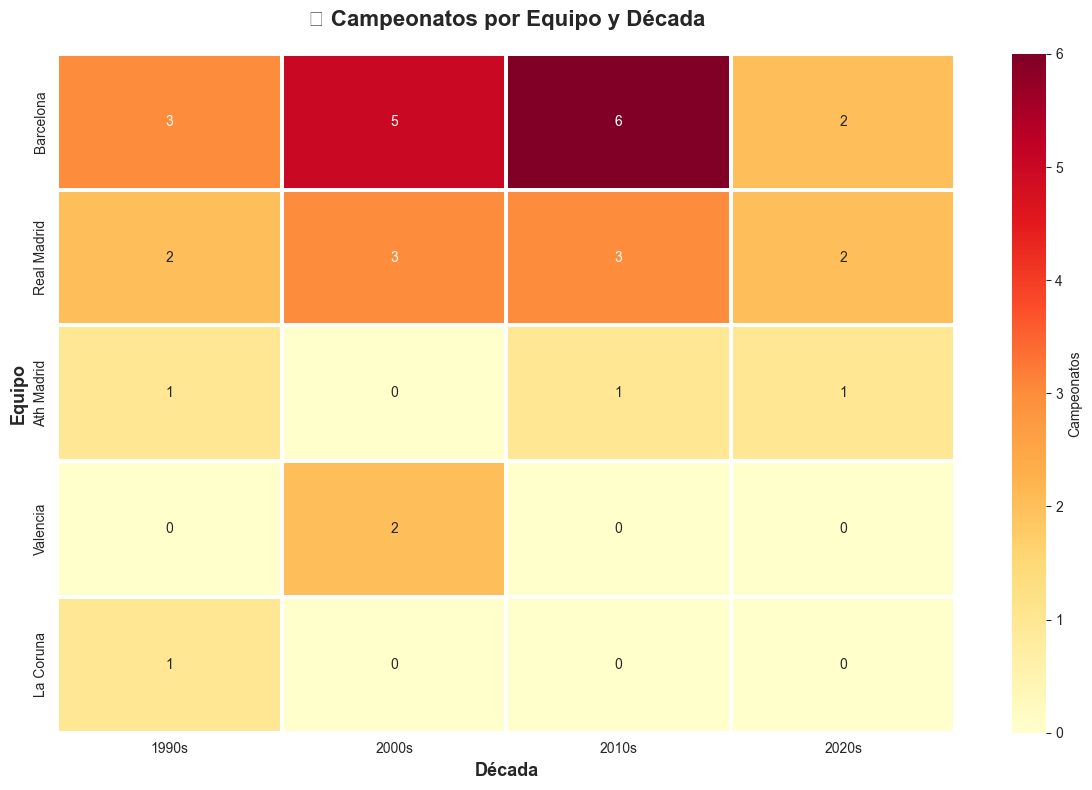

/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:450: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:451: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig('evolucion_equipos_dominantes.png', dpi=300, bbox_inches='tight')
/Users/juanmy_bg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


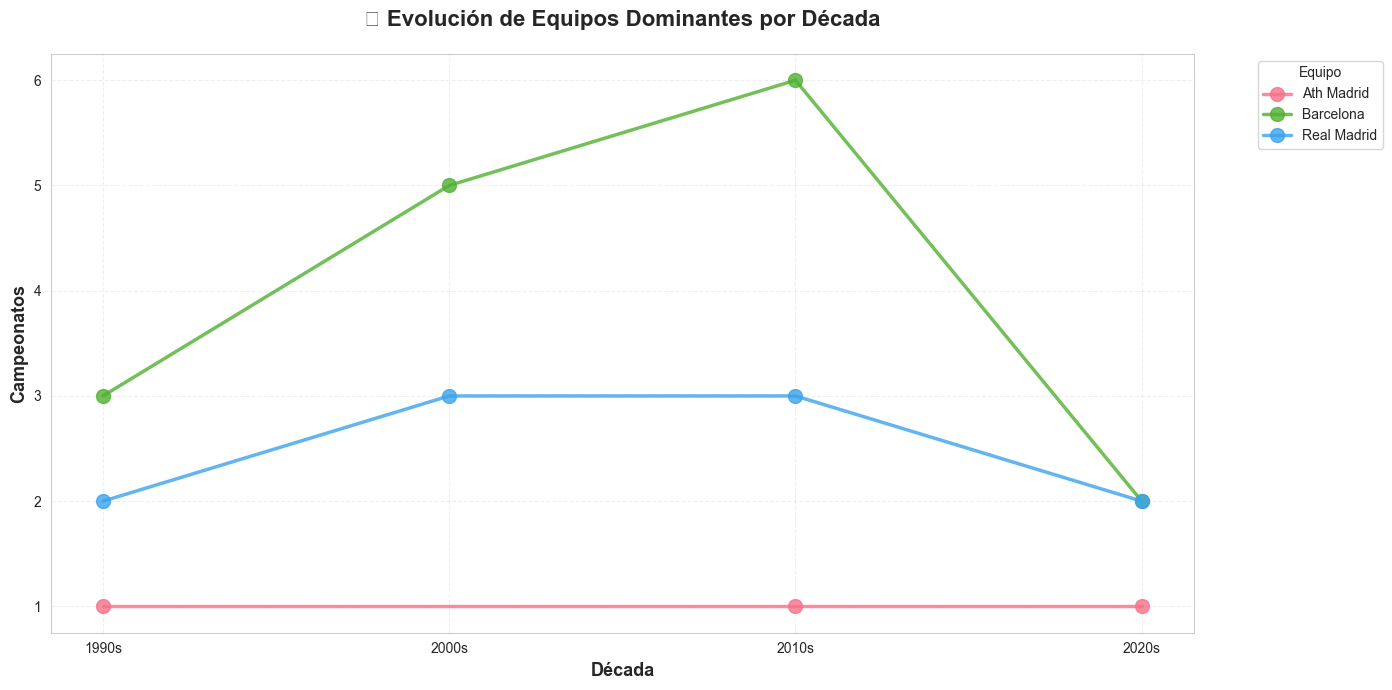

/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:490: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:490: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:491: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Arial.
  plt.savefig('campeon_vs_subcampeon_decadas.png', dpi=300, bbox_inches='tight')
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:491: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Arial.
  plt.savefig('campeon_vs_subcampeon_decadas.png', dpi=300, bbox_inches='tight')
/Users/juanmy_bg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missin

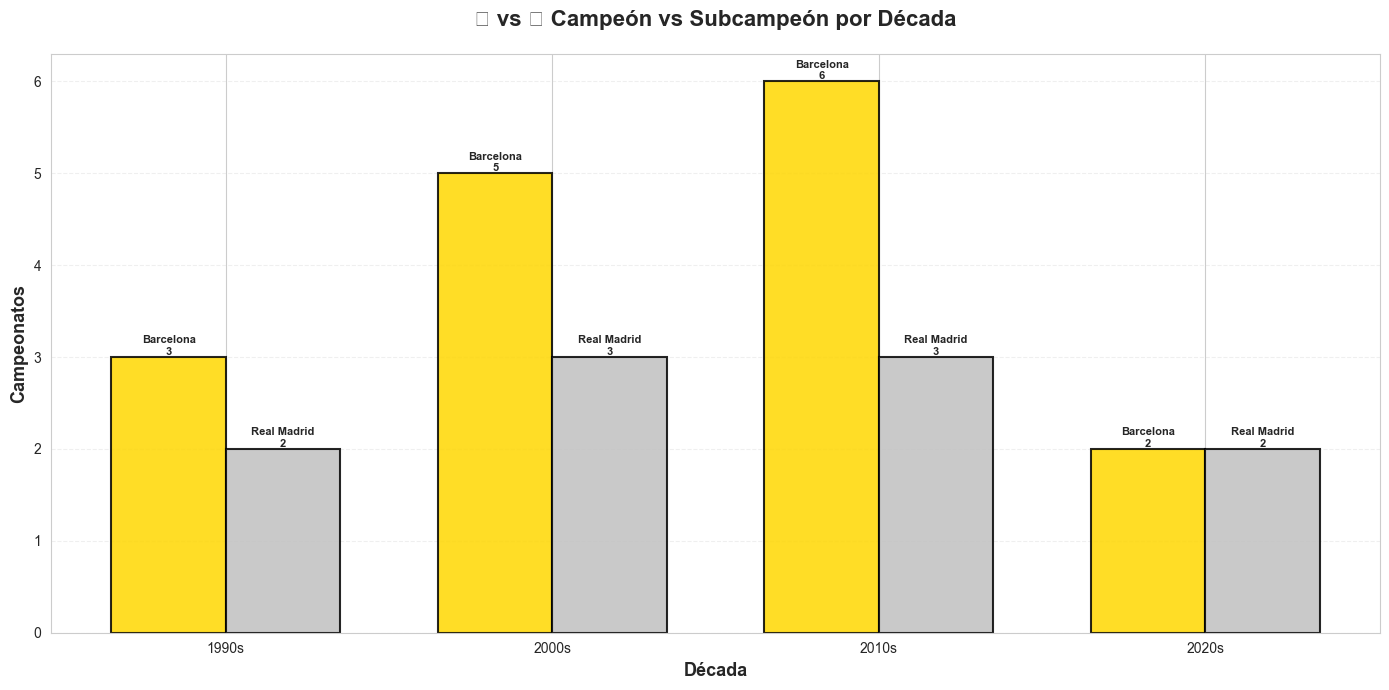

/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:518: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tw/r9jhfmdn0xnbfvz0yn103hbc0000gn/T/ipykernel_58642/398963998.py:519: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.savefig('tarjetas_mejores_equipos_decadas.png', dpi=300, bbox_inches='tight')
/Users/juanmy_bg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


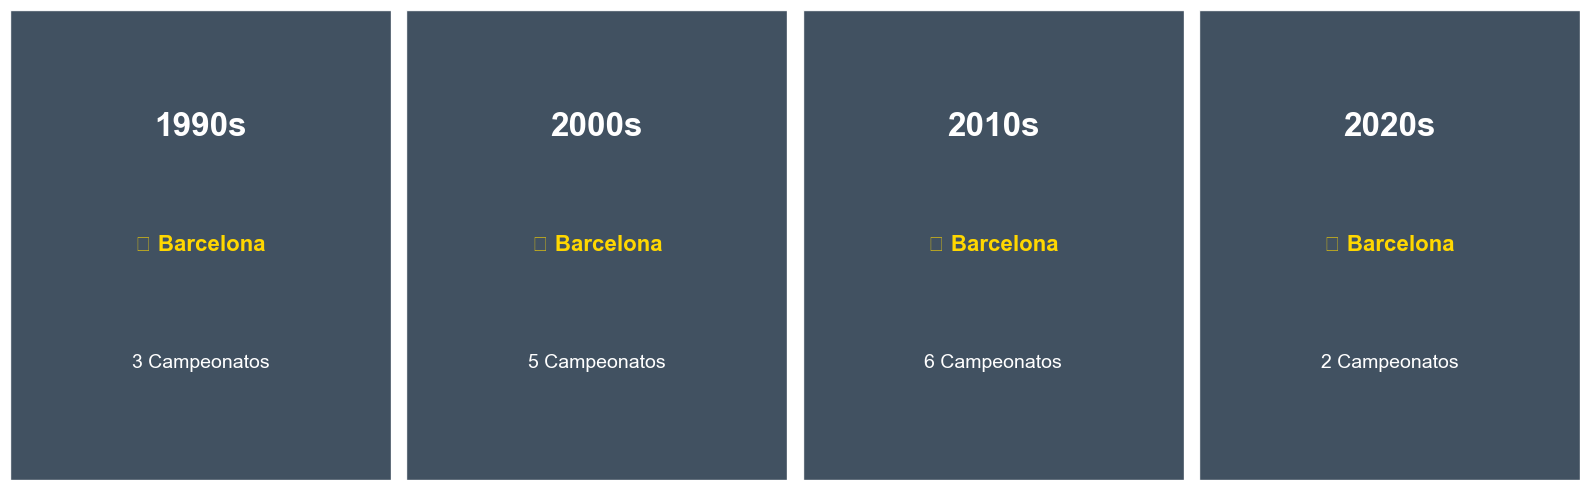

In [21]:
# Configuration of the visualitations 

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# ============================================================================
# 1. GOLES COMO LOCAL (sin importar equipo ni temporada)
# ============================================================================
print("\n" + "=" * 80)
print("1. GOLES COMO LOCAL (GENERAL)")
print("=" * 80)
print(f"  Media:        {df['FTHG'].mean():.2f} goles")
print(f"  Mediana:      {df['FTHG'].median():.2f} goles")
print(f"  Moda:         {df['FTHG'].mode()[0]} goles")
print(f"  Desv. Estándar: {df['FTHG'].std():.2f}")
print(f"  Mínimo:       {df['FTHG'].min()} goles")
print(f"  Máximo:       {df['FTHG'].max()} goles")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['FTHG'], bins=range(0, df['FTHG'].max()+2), 
            color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0].axvline(df['FTHG'].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Media: {df["FTHG"].mean():.2f}')
axes[0].axvline(df['FTHG'].median(), color='blue', linestyle='--', 
               linewidth=2, label=f'Mediana: {df["FTHG"].median():.2f}')
axes[0].set_title('Distribución de Goles como Local', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Goles')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['FTHG'], vert=True, patch_artist=True,
               boxprops=dict(facecolor='#2ecc71', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Box Plot - Goles como Local', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Goles')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('01_goles_local_general.png', dpi=300, bbox_inches='tight')
plt.show()



# ============================================================================
# 2. GOLES COMO VISITANTE (sin importar equipo ni temporada)
# ============================================================================
print("\n" + "=" * 80)
print("2. GOLES COMO VISITANTE (GENERAL)")
print("=" * 80)
print(f"  Media:        {df['FTAG'].mean():.2f} goles")
print(f"  Mediana:      {df['FTAG'].median():.2f} goles")
print(f"  Moda:         {df['FTAG'].mode()[0]} goles")
print(f"  Desv. Estándar: {df['FTAG'].std():.2f}")
print(f"  Mínimo:       {df['FTAG'].min()} goles")
print(f"  Máximo:       {df['FTAG'].max()} goles")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['FTAG'], bins=range(0, df['FTAG'].max()+2), 
            color='#e74c3c', edgecolor='black', alpha=0.7)
axes[0].axvline(df['FTAG'].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Media: {df["FTAG"].mean():.2f}')
axes[0].axvline(df['FTAG'].median(), color='blue', linestyle='--', 
               linewidth=2, label=f'Mediana: {df["FTAG"].median():.2f}')
axes[0].set_title('Distribución de Goles como Visitante', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Goles')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['FTAG'], vert=True, patch_artist=True,
               boxprops=dict(facecolor='#e74c3c', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Box Plot - Goles como Visitante', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Goles')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('02_goles_visitante_general.png', dpi=300, bbox_inches='tight')
plt.show()



# Comparación Local vs Visitante
fig, ax = plt.subplots(figsize=(10, 6))
positions = [1, 2]
data_to_plot = [df['FTHG'], df['FTAG']]
bp = ax.boxplot(data_to_plot, positions=positions, patch_artist=True,
               tick_labels=['Local', 'Visitante'])
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
ax.set_title('Comparación: Goles Local vs Visitante', fontsize=14, fontweight='bold')
ax.set_ylabel('Goles')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('03_comparacion_local_visitante.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 5. GOLES TOTALES POR TEMPORADA
# ============================================================================
print("\n" + "=" * 80)
print("5. GOLES TOTALES POR TEMPORADA")
print("=" * 80)

season_goals = df.groupby('Season').agg({
    'TotalGoals': ['mean', 'median', 'sum', 'count'],
    'FTHG': 'mean',
    'FTAG': 'mean'
}).round(2)
season_goals.columns = ['Media_Total', 'Mediana_Total', 'Total_Goles', 'Partidos', 
                        'Media_Local', 'Media_Visitante']

print(season_goals)

# Gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Promedio por temporada
season_goals['Media_Total'].plot(kind='bar', ax=axes[0, 0], color='#3498db', alpha=0.7)
axes[0, 0].set_title('Promedio de Goles por Partido - Por Temporada', fontweight='bold')
axes[0, 0].set_xlabel('Temporada')
axes[0, 0].set_ylabel('Promedio de Goles')
axes[0, 0].grid(alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# Total de goles por temporada
season_goals['Total_Goles'].plot(kind='bar', ax=axes[0, 1], color='#9b59b6', alpha=0.7)
axes[0, 1].set_title('Total de Goles - Por Temporada', fontweight='bold')
axes[0, 1].set_xlabel('Temporada')
axes[0, 1].set_ylabel('Total de Goles')
axes[0, 1].grid(alpha=0.3, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# Evolución Local vs Visitante
season_goals[['Media_Local', 'Media_Visitante']].plot(ax=axes[1, 0], marker='o', linewidth=2)
axes[1, 0].set_title('Evolución: Goles Local vs Visitante por Temporada', fontweight='bold')
axes[1, 0].set_xlabel('Temporada')
axes[1, 0].set_ylabel('Promedio de Goles')
axes[1, 0].legend(['Local', 'Visitante'])
axes[1, 0].grid(alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot por temporada
df.boxplot(column='TotalGoals', by='Season', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_title('Distribución de Goles por Temporada', fontweight='bold')
axes[1, 1].set_xlabel('Temporada')
axes[1, 1].set_ylabel('Goles Totales')
axes[1, 1].get_figure().suptitle('')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('06_goles_por_temporada.png', dpi=300, bbox_inches='tight')
plt.show()


#============================================================================= 
# ALL TIME RESULTS
# ============================================================================
# Resultados como local
home_results = df.groupby(['Season', 'HomeTeam'], observed=True)['FTR'].apply(
    lambda x: pd.Series({
        'Victorias_Local': (x == 'H').sum(),
        'Empates_Local': (x == 'D').sum(),
        'Derrotas_Local': (x == 'A').sum()
    })
).unstack().reset_index()

# Resultados como visitante
away_results = df.groupby(['Season', 'AwayTeam'], observed=True)['FTR'].apply(
    lambda x: pd.Series({
        'Victorias_Visitante': (x == 'A').sum(),
        'Empates_Visitante': (x == 'D').sum(),
        'Derrotas_Visitante': (x == 'H').sum()
    })
).unstack().reset_index()

# Combinar resultados locales y visitantes
results = pd.merge(
    home_results.rename(columns={'HomeTeam': 'Equipo'}),
    away_results.rename(columns={'AwayTeam': 'Equipo'}),
    on=['Season', 'Equipo'],
    how='outer'
)

results['Victorias_Totales'] = results['Victorias_Local'] + results['Victorias_Visitante']

results = results.sort_values(['Season'], ascending= True)
print(results)


# # ============================================================================
# # 6. VICTORIAS POR TEMPORADA DE CADA EQUIPO
# # ============================================================================
print("\n" + "=" * 80)
print("6. VICTORIAS POR TEMPORADA DE CADA EQUIPO")
print("=" * 80)

# Resumen por equipo (todas las temporadas)
total_victories = results.groupby('Equipo',observed= True).agg({ 
    'Victorias_Totales': 'sum',
    'Victorias_Local': 'sum',
    'Victorias_Visitante': 'sum'
}).round(2)
total_victories.columns = ['V_Total','V_Local','V_Visitante']
total_victories = total_victories.sort_values('V_Total', ascending=False)

print("\nTop 10 Equipos con más victorias (todas las temporadas):")
print(total_victories.head(10))

# Gráfico - Top 15 equipos con más victorias
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

top15_victories = total_victories.head(15)

# Victorias totales
axes[0].barh(range(len(top15_victories)), top15_victories['V_Total'], color='#f39c12', alpha=0.7)
axes[0].set_yticks(range(len(top15_victories)))
axes[0].set_yticklabels(top15_victories.index)
axes[0].set_xlabel('Total de Victorias')
axes[0].set_title('Top 15 Equipos - Total de Victorias (Todas las Temporadas)', 
                  fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Victorias Local vs Visitante
x = range(len(top15_victories))
axes[1].barh([i - 0.2 for i in x], top15_victories['V_Local'], 
            height=0.4, label='Local', color='#2ecc71', alpha=0.7)
axes[1].barh([i + 0.2 for i in x], top15_victories['V_Visitante'], 
            height=0.4, label='Visitante', color='#e74c3c', alpha=0.7)
axes[1].set_yticks(x)
axes[1].set_yticklabels(top15_victories.index)
axes[1].set_xlabel('Victorias')
axes[1].set_title('Top 15 Equipos - Victorias Local vs Visitante', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('07_victorias_equipos_total.png', dpi=300, bbox_inches='tight')
plt.show()

# Victorias por temporada (equipos seleccionados - Top 5)
top5_teams = total_victories.head(5).index.tolist()
victories_top5 = results[results['Equipo'].isin(top5_teams)]

fig, ax = plt.subplots(figsize=(14, 7))
for equipo in top5_teams:
    team_data = victories_top5[victories_top5['Equipo'] == equipo]
    ax.plot(team_data['Season'], team_data['Victorias_Totales'], 
           marker='o', linewidth=2, label=equipo)

ax.set_title('Evolución de Victorias por Temporada - Top 5 Equipos', 
            fontsize=14, fontweight='bold')
ax.set_xlabel('Temporada')
ax.set_ylabel('Victorias')
ax.legend(loc='best')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('08_evolucion_victorias_top5.png', dpi=300, bbox_inches='tight')
plt.show()

# # # ============================================================================
# # # 7. TOP 3 EQUIPOS MAS EXITOSOS POR CADA DECADA 
# # # ============================================================================

home_points = df.groupby(['Season', 'HomeTeam'], observed=True)['FTR'].apply(
    lambda x: pd.Series({
        'Puntos_Local': (x == 'H').sum() * 3 + (x == 'D').sum()
    })
).unstack().reset_index()

# Puntos como visitante
away_points = df.groupby(['Season', 'AwayTeam'], observed=True)['FTR'].apply(
    lambda x: pd.Series({
        'Puntos_Visitante': (x == 'A').sum() * 3 + (x == 'D').sum()
    })
).unstack().reset_index()

# Combinar puntos
team_points = pd.merge(
    home_points.rename(columns={'HomeTeam': 'Equipo'}),
    away_points.rename(columns={'AwayTeam': 'Equipo'}),
    on=['Season', 'Equipo'],
    how='outer'
)

# Calcular puntos totales
team_points['Puntos_Totales'] = team_points['Puntos_Local'].fillna(0) + team_points['Puntos_Visitante'].fillna(0)

# Determinar el campeón de cada temporada 
champions_by_season = {}
for season in team_points['Season'].unique():

    #Filtrar datos de la temporada actual
    season_data = team_points[team_points['Season'] == season]

    if not season_data.empty:
        champion = season_data.loc[season_data['Puntos_Totales'].idxmax(), 'Equipo']
        champions_by_season[season] = champion
        

champions_df = pd.DataFrame(list(champions_by_season.items()), columns=['Season', 'Champion'])


champions_df['Decade'] = champions_df['Season'].str[:4].astype(int)
champions_df['Decade'] = (champions_df['Decade'] // 10) * 10

# Contar campeonatos por equipo y década
championships_by_decade = champions_df.groupby(['Decade', 'Champion']).size().reset_index(name='Championships')

# # Encontrar el mejor equipo de cada década
best_teams_by_decade = championships_by_decade[
    championships_by_decade.groupby('Decade')['Championships']
    .transform('max') == championships_by_decade['Championships']
]

# Mostrar resultados
print("=" * 60)
print("MEJORES EQUIPOS POR DÉCADAS (basado en campeonatos ganados)")
print("=" * 60)
for _, row in best_teams_by_decade.iterrows():
    print(f"\nDécada {int(row['Decade'])}s:")
    print(f"{row['Champion']}: {int(row['Championships'])} campeonatos")


#=========================================
# Visualiciones 
#=========================================

# ============================================================================
# TOP 3 EQUIPOS MÁS EXITOSOS POR DÉCADA
# ============================================================================

# Obtener Top 3 por década
top3_by_decade = championships_by_decade.sort_values(['Decade', 'Championships'], ascending=[True, False])
top3_by_decade = top3_by_decade.groupby('Decade').head(3)

decades = sorted(championships_by_decade['Decade'].unique())

# ============================================================================
# 1. GRÁFICO DE BARRAS - TOP 3 POR DÉCADA
# ============================================================================
n_decades = len(decades)
fig, axes = plt.subplots((n_decades + 1) // 2, 2, figsize=(16, 5 * ((n_decades + 1) // 2)))
axes = axes.flatten() if n_decades > 1 else [axes]

for idx, decade in enumerate(decades):
    ax = axes[idx]
    top3 = top3_by_decade[top3_by_decade['Decade'] == decade].head(3)
    
    # Colores medalla
    colors = ['#FFD700', '#C0C0C0', '#CD7F32'][:len(top3)]
    
    bars = ax.bar(range(len(top3)), top3['Championships'], 
                  color=colors, alpha=0.85, edgecolor='black', linewidth=2)
    
    # Configuración del gráfico
    ax.set_xticks(range(len(top3)))
    ax.set_xticklabels(top3['Champion'], rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Campeonatos', fontsize=11, fontweight='bold')
    ax.set_title(f'🏆 Top 3 - Década {int(decade)}s', fontsize=13, fontweight='bold')
    ax.grid(alpha=0.3, axis='y', linestyle='--')
    
    # Añadir valores sobre las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        medal = ['🥇', '🥈', '🥉'][i] if i < 3 else ''
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{medal}\n{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ocultar subplots vacíos
for idx in range(len(decades), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('top3_equipos_por_decada_barras.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 2. HEATMAP - CAMPEONATOS POR EQUIPO Y DÉCADA
# ============================================================================
pivot_championships = championships_by_decade.pivot_table(
    values='Championships',
    index='Champion',
    columns='Decade',
    fill_value=0
)

# Ordenar por total de campeonatos
pivot_championships['Total'] = pivot_championships.sum(axis=1)
pivot_championships = pivot_championships.sort_values('Total', ascending=False).drop('Total', axis=1)

# Filtrar equipos con al menos 1 campeonato
pivot_championships = pivot_championships[pivot_championships.sum(axis=1) > 0]

fig, ax = plt.subplots(figsize=(12, max(8, len(pivot_championships) * 0.5)))
sns.heatmap(pivot_championships, annot=True, fmt='g', cmap='YlOrRd',
           cbar_kws={'label': 'Campeonatos'}, linewidths=1.5, linecolor='white',
           ax=ax, vmin=0, vmax=pivot_championships.max().max())

ax.set_title('🏆 Campeonatos por Equipo y Década', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Década', fontsize=13, fontweight='bold')
ax.set_ylabel('Equipo', fontsize=13, fontweight='bold')
ax.set_xticklabels([f"{int(x)}s" for x in pivot_championships.columns], rotation=0)

plt.tight_layout()
plt.savefig('heatmap_campeonatos_decadas.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 3. GRÁFICO DE LÍNEAS - EVOLUCIÓN DEL MEJOR EQUIPO POR DÉCADA
# ============================================================================
fig, ax = plt.subplots(figsize=(14, 7))

# Obtener equipos que aparecen en más de una década
teams_multiple_decades = championships_by_decade.groupby('Champion')['Decade'].nunique()
teams_multiple_decades = teams_multiple_decades[teams_multiple_decades > 1].index

colors_palette = sns.color_palette('husl', len(teams_multiple_decades))

for idx, team in enumerate(teams_multiple_decades):
    team_data = championships_by_decade[championships_by_decade['Champion'] == team]
    ax.plot(team_data['Decade'], team_data['Championships'], 
           marker='o', markersize=10, linewidth=2.5, label=team,
           color=colors_palette[idx], alpha=0.8)

ax.set_xlabel('Década', fontsize=13, fontweight='bold')
ax.set_ylabel('Campeonatos', fontsize=13, fontweight='bold')
ax.set_title('📈 Evolución de Equipos Dominantes por Década', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(decades)
ax.set_xticklabels([f"{int(d)}s" for d in decades])
ax.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('evolucion_equipos_dominantes.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 4. GRÁFICO COMPARATIVO - MEJOR EQUIPO VS RUNNER-UP POR DÉCADA
# ============================================================================
fig, ax = plt.subplots(figsize=(14, 7))

x_pos = np.arange(len(decades))
width = 0.35

for idx, decade in enumerate(decades):
    decade_data = top3_by_decade[top3_by_decade['Decade'] == decade].head(2)
    
    if len(decade_data) >= 1:
        champion = decade_data.iloc[0]
        ax.bar(idx - width/2, champion['Championships'], width,
              label=f"{champion['Champion']}" if idx == 0 else "",
              color='#FFD700', alpha=0.85, edgecolor='black', linewidth=1.5)
        ax.text(idx - width/2, champion['Championships'], 
               f"{champion['Champion']}\n{int(champion['Championships'])}",
               ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    if len(decade_data) >= 2:
        runner_up = decade_data.iloc[1]
        ax.bar(idx + width/2, runner_up['Championships'], width,
              color='#C0C0C0', alpha=0.85, edgecolor='black', linewidth=1.5)
        ax.text(idx + width/2, runner_up['Championships'],
               f"{runner_up['Champion']}\n{int(runner_up['Championships'])}",
               ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_xlabel('Década', fontsize=13, fontweight='bold')
ax.set_ylabel('Campeonatos', fontsize=13, fontweight='bold')
ax.set_title('🥇 vs 🥈 Campeón vs Subcampeón por Década', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels([f"{int(d)}s" for d in decades])
ax.grid(alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('campeon_vs_subcampeon_decadas.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 5. RESUMEN VISUAL - TARJETAS CON EL MEJOR DE CADA DÉCADA
# ============================================================================
fig, axes = plt.subplots(1, len(decades), figsize=(4*len(decades), 5))
if len(decades) == 1:
    axes = [axes]

for idx, decade in enumerate(decades):
    ax = axes[idx]
    best = best_teams_by_decade[best_teams_by_decade['Decade'] == decade].iloc[0]
    
    # Crear tarjeta
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, facecolor='#2c3e50', alpha=0.9))
    ax.text(0.5, 0.75, f"{int(decade)}s", 
           ha='center', va='center', fontsize=24, color='white', fontweight='bold')
    ax.text(0.5, 0.5, f"🏆 {best['Champion']}", 
           ha='center', va='center', fontsize=16, color='#FFD700', fontweight='bold')
    ax.text(0.5, 0.25, f"{int(best['Championships'])} Campeonatos", 
           ha='center', va='center', fontsize=14, color='white')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

plt.tight_layout()
plt.savefig('tarjetas_mejores_equipos_decadas.png', dpi=300, bbox_inches='tight')
plt.show()


Pruebas de Hipotesis(Z-Test):
Esta se utiliza para probar que estadisticamente si existe una ventaja a la hora de jugar como local 

In [20]:
def home_advantage_z_test(df):
    mean_in_data = df[df['FTR'] == 'H'].count()['FTR'] / len(df)
    mean_expected = 1/3
    alpha =  0.05

    z_score  = (mean_in_data - mean_expected) / math.sqrt(mean_expected * (1 - mean_expected) / len(df))


    z_critical = stats.norm.ppf(1 - alpha/2)
    print('Critical Z-Score:',z_critical)

    if np.abs(z_score) > z_critical:
        print("Reject the null hypothesis, this prove that home advantage exist.")
    else:
        print("Fail to reject the null hypothesis, there is no enough evidence to prove that home advantage exist.")

home_advantage_z_test(df)


Critical Z-Score: 1.959963984540054
Reject the null hypothesis, this prove that home advantage exist.
